In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = '2012-01-01'
end = '2023-12-21'
stock = 'AAPL'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433826,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500646,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639425,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771561,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751300,394024400
...,...,...,...,...,...,...,...
3007,2023-12-14,198.020004,199.619995,196.160004,198.110001,197.857529,66831600
3008,2023-12-15,197.529999,198.399994,197.000000,197.570007,197.318222,128256700
3009,2023-12-18,196.089996,196.630005,194.389999,195.889999,195.640350,55751900
3010,2023-12-19,196.160004,196.949997,195.889999,196.940002,196.689026,40714100


In [ ]:
ma_100_days = data.Close.rolling(100).mean()

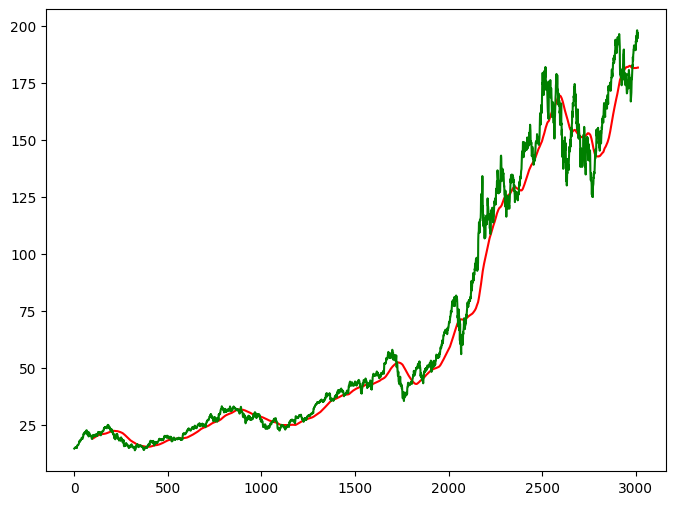

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [ ]:
ma_200_days = data.Close.rolling(200).mean()

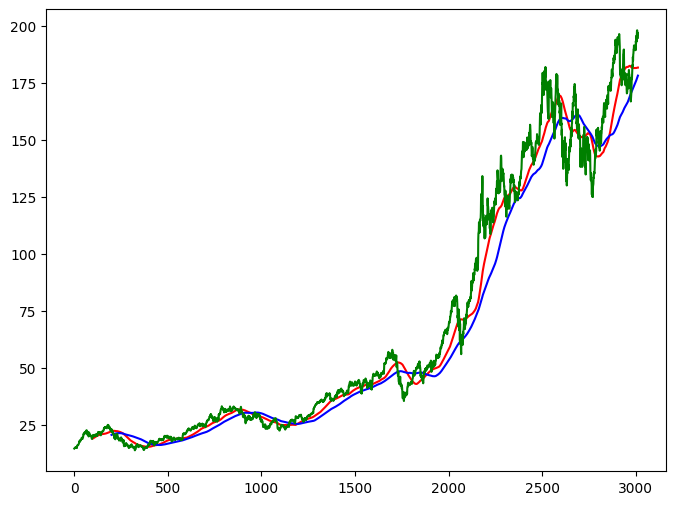

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [ ]:
data_train.shape[0]

2409

In [ ]:
data_test.shape[0]

603

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [ ]:
x, y = np.array(x), np.array(y)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
# model = Sequential()
# model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
#                input_shape = ((x.shape[1],1))))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 60, activation='relu', return_sequences = True))
# model.add(Dropout(0.3))

# model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
# model.add(Dropout(0.4))

# model.add(LSTM(units = 120, activation = 'relu'))
# model.add(Dropout(0.5))

# model.add(Dense(units =1))

#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x, y, epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
37/37 [==============================] - 12s 171ms/step - loss: 0.0117
Epoch 2/100
37/37 [==============================] - 5s 141ms/step - loss: 8.4218e-04
Epoch 3/100
37/37 [==============================] - 6s 169ms/step - loss: 6.0816e-04
Epoch 4/100
37/37 [==============================] - 5s 140ms/step - loss: 5.3828e-04
Epoch 5/100
37/37 [==============================] - 6s 168ms/step - loss: 6.2674e-04
Epoch 6/100
37/37 [==============================] - 5s 141ms/step - loss: 4.8789e-04
Epoch 7/100
37/37 [==============================] - 6s 169ms/step - loss: 4.9599e-04
Epoch 8/100
37/37 [==============================] - 5s 143ms/step - loss: 4.8746e-04
Epoch 9/100
37/37 [==============================] - 6s 169ms/step - loss: 4.3437e-04
Epoch 10/100
37/37 [==============================] - 6s 157ms/step - loss: 5.6316e-04
Epoch 11/100
37/37 [==============================] - 6s 160ms/step - loss: 4.1587e-04
Epoch 12/100
37/37 [==============================] - 6

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
pas_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [ ]:
data_test_scale  =  scaler.fit_transform(data_test)

In [ ]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [ ]:
y_predict = model.predict(x)

19/19 [==============================] - 2s 32ms/step


In [ ]:
scale =1/scaler.scale_

In [ ]:
y_predict = y_predict*scale

In [ ]:
y = y*scale

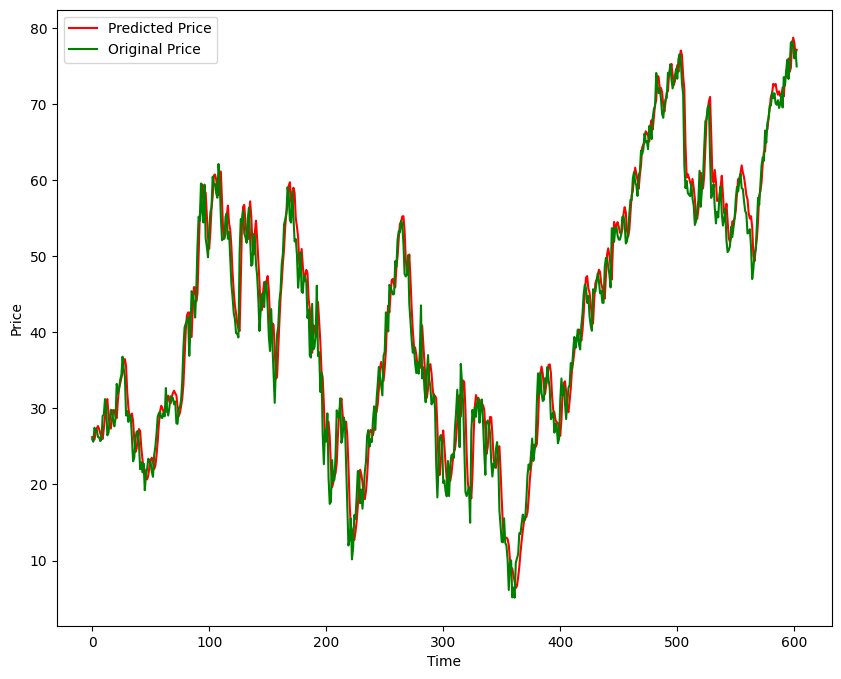

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Assuming y_test contains the actual stock prices and has been scaled back to the original scale
# Assuming ensemble_predictions also scaled back to the original scale

# Calculate MSE, MAE, and MAPE
mse = mean_squared_error(y, y_predict)
mae = mean_absolute_error(y, y_predict)
mape = mean_absolute_percentage_error(y, y_predict)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape*100:.2f}%")

Mean Squared Error: 10.307710825406984
Mean Absolute Error: 2.4765447652811634
Mean Absolute Percentage Error: 8.02%


In [ ]:
model.save('Stock Predictions Model.keras')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

In [ ]:
start = '2012-01-01'
end = '2023-12-21'
stock = 'AAPL'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433826,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500646,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639425,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771561,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751300,394024400
...,...,...,...,...,...,...,...
3007,2023-12-14,198.020004,199.619995,196.160004,198.110001,197.857529,66831600
3008,2023-12-15,197.529999,198.399994,197.000000,197.570007,197.318222,128256700
3009,2023-12-18,196.089996,196.630005,194.389999,195.889999,195.640350,55751900
3010,2023-12-19,196.160004,196.949997,195.889999,196.940002,196.689026,40714100


In [ ]:
data.dropna(inplace=True)

data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

data_train.shape, data_test.shape

((2409, 1), (603, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0,1))
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

x, y = np.array(x), np.array(y)
x, y

(array([[[0.00546799],
         [0.00605176],
         [0.00726423],
         ...,
         [0.0439658 ],
         [0.04755566],
         [0.04617149]],
 
        [[0.00605176],
         [0.00726423],
         [0.00841859],
         ...,
         [0.04755566],
         [0.04617149],
         [0.04537109]],
 
        [[0.00726423],
         [0.00841859],
         [0.0082416 ],
         ...,
         [0.04617149],
         [0.04537109],
         [0.04800735]],
 
        ...,
 
        [[0.78535901],
         [0.79490026],
         [0.75747494],
         ...,
         [0.98261873],
         [0.9956362 ],
         [0.99881668]],
 
        [[0.79490026],
         [0.75747494],
         [0.79245947],
         ...,
         [0.9956362 ],
         [0.99881668],
         [0.98239685]],
 
        [[0.75747494],
         [0.79245947],
         [0.78424961],
         ...,
         [0.99881668],
         [0.98239685],
         [0.96915739]]]),
 array([0.04537109, 0.04800735, 0.04983002, ..., 0.9823

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.metrics import mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import layers
import time
import timeit

In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0, epsilon=1e-6, attention_axes=None, kernel_size=1):
  """
  Creates a single transformer block.
  """
  x = layers.LayerNormalization(epsilon=epsilon)(inputs)
  x = layers.MultiHeadAttention(
      key_dim=head_size, num_heads=num_heads, dropout=dropout,
      attention_axes=attention_axes
      )(x, x)
  x = layers.Dropout(dropout)(x)
  res = x + inputs

    # Feed Forward Part
  x = layers.LayerNormalization(epsilon=epsilon)(res)
  x = layers.Conv1D(filters=ff_dim, kernel_size=kernel_size, activation="relu")(x)
  x = layers.Dropout(dropout)(x)
  x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=kernel_size)(x)
  return x + res

def build_transfromer(head_size, num_heads, ff_dim, num_trans_blocks, mlp_units, dropout=0, mlp_dropout=0, attention_axes=None, epsilon=1e-6, kernel_size=1):
  """
  Creates final model by building many transformer blocks.
  """
  n_timesteps, n_features, n_outputs = 100, 1, 1
  inputs = tf.keras.Input(shape=(n_timesteps, n_features))
  x = inputs
  for _ in range(num_trans_blocks):
    x = transformer_encoder(x, head_size=head_size, num_heads=num_heads, ff_dim=ff_dim, dropout=dropout, attention_axes=attention_axes, kernel_size=kernel_size, epsilon=epsilon)

  x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
  for dim in mlp_units:
    x = layers.Dense(dim, activation="relu")(x)
    x = layers.Dropout(mlp_dropout)(x)

  outputs = layers.Dense(n_outputs)(x)
  return tf.keras.Model(inputs, outputs)


In [ ]:
transformer = build_transfromer(head_size=128, num_heads=4, ff_dim=2, num_trans_blocks=4, mlp_units=[256], mlp_dropout=0.10, dropout=0.10, attention_axes=1)
transformer.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 1)]             0         []                            
                                                                                                  
 layer_normalization (Layer  (None, 100, 1)               2         ['input_1[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 multi_head_attention (Mult  (None, 100, 1)               3585      ['layer_normalization[0][0]', 
 iHeadAttention)                                                     'layer_normalization[0][0]'] 
                                                                                              

In [ ]:
def fit_transformer(transformer: tf.keras.Model):
  """
  Compiles and fits our transformer.
  """
  transformer.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["mae", 'mape'])

  callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)]
  start = time.time()
  hist = transformer.fit(x, y, batch_size=64, epochs=50, verbose=1, callbacks=callbacks)
  print(time.time() - start)
  return hist


hist = fit_transformer(transformer)

Epoch 1/50
37/37 [==============================] - 52s 1s/step - loss: 0.0175 - mae: 0.0882 - mape: 25686.5410
Epoch 2/50
37/37 [==============================] - 40s 1s/step - loss: 0.0048 - mae: 0.0436 - mape: 8070.8730
Epoch 3/50
37/37 [==============================] - 44s 1s/step - loss: 0.0041 - mae: 0.0391 - mape: 858.4324
Epoch 4/50
37/37 [==============================] - 40s 1s/step - loss: 0.0024 - mae: 0.0312 - mape: 3846.1238
Epoch 5/50
37/37 [==============================] - 40s 1s/step - loss: 0.0025 - mae: 0.0301 - mape: 27344.0234
Epoch 6/50
37/37 [==============================] - 41s 1s/step - loss: 0.0021 - mae: 0.0294 - mape: 27951.6875
Epoch 7/50
37/37 [==============================] - 41s 1s/step - loss: 0.0014 - mae: 0.0234 - mape: 8866.6621
Epoch 8/50
37/37 [==============================] - 42s 1s/step - loss: 9.7681e-04 - mae: 0.0200 - mape: 9762.5508
Epoch 9/50
37/37 [==============================] - 41s 1s/step - loss: 9.5746e-04 - mae: 0.0191 - mape: 6

In [ ]:
pas_100_days = data_train.tail(100)
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

data_test_scale  =  scaler.fit_transform(data_test)
xtest = []
ytest = []
for i in range(100, data_test_scale.shape[0]):
    xtest.append(data_test_scale[i-100:i])
    ytest.append(data_test_scale[i,0])
xtest, ytest = np.array(xtest), np.array(ytest)

In [ ]:
y_predict = transformer.predict(xtest)
scale = 1/scaler.scale_
y_predict = y_predict*scale
ytest = ytest*scale

19/19 [==============================] - 4s 187ms/step


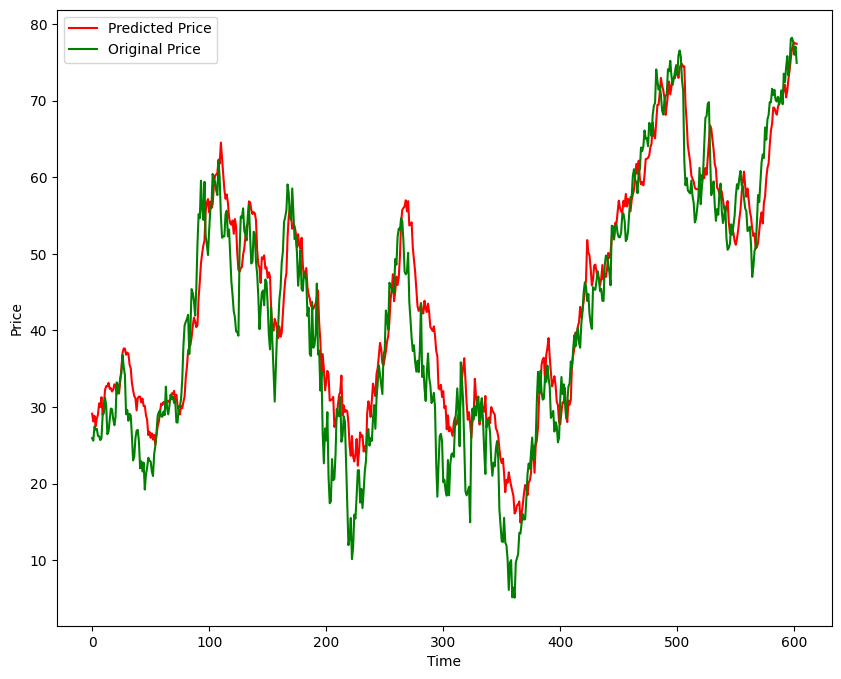

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(ytest, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Assuming y_test contains the actual stock prices and has been scaled back to the original scale
# Assuming ensemble_predictions also scaled back to the original scale

# Calculate MSE, MAE, and MAPE
mse = mean_squared_error(ytest, y_predict)
mae = mean_absolute_error(ytest, y_predict)
mape = mean_absolute_percentage_error(ytest, y_predict)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape*100:.2f}%")

Mean Squared Error: 30.93363945847764
Mean Absolute Error: 4.335967589649652
Mean Absolute Percentage Error: 15.81%


In [ ]:
transformer.save('TransformerModel.keras')

In [ ]:
lstm_model = tf.keras.models.load_model('Stock Predictions Model.keras')
transformer_model = tf.keras.models.load_model('TransformerModel.keras')


In [ ]:
# Prediction using LSTM model
y_predict_lstm = lstm_model.predict(xtest)

# Prediction using Transformer model
y_predict_transformer = transformer_model.predict(xtest)

# Rescaling the predictions back to the original price range
y_predict_lstm = y_predict_lstm * scale
y_predict_transformer = y_predict_transformer * scale


19/19 [==============================] - 5s 223ms/step


In [ ]:
# Averaging predictions
y_predict_ensemble = (y_predict_lstm + y_predict_transformer) / 2


19/19 [==============================] - 4s 189ms/step


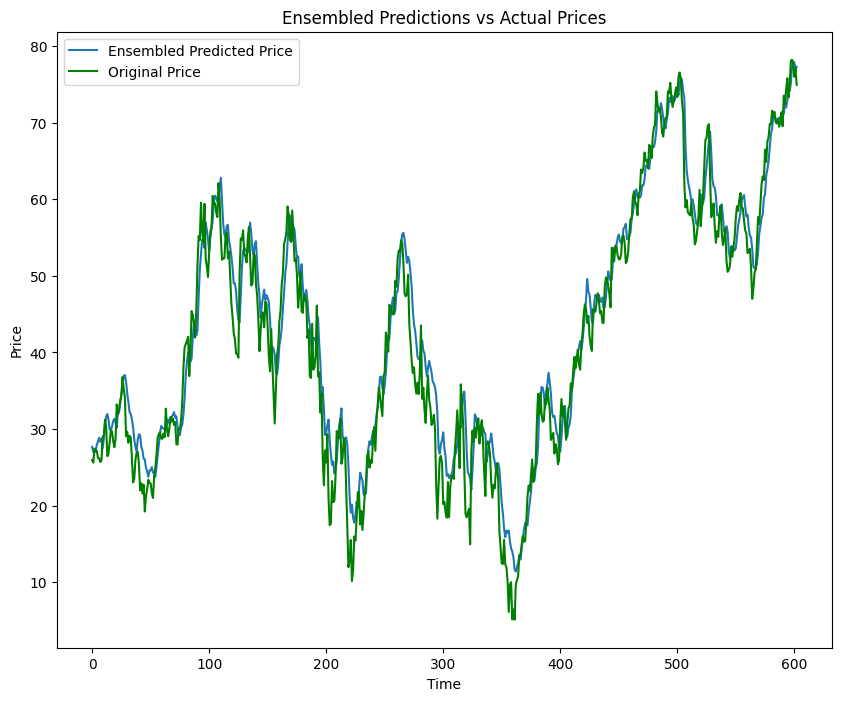

In [ ]:
# For LSTM
y_lstm_pred = model.predict(xtest)  #  LSTM model and 'x' LSTM input features
y_lstm_pred = y_lstm_pred * scale

# For Transformer
y_transformer_pred = transformer.predict(xtest)  # 'transformer model and 'xtest' input features
y_transformer_pred = y_transformer_pred * scale

# Ensembling predictions
ensemble_predictions = 0.5 * y_lstm_pred + 0.5 * y_transformer_pred



# Plotting ensemble results
plt.figure(figsize=(10,8))
plt.plot(ensemble_predictions, '', label='Ensembled Predicted Price')
plt.plot(ytest, 'g', label='Original Price')  # Assuming 'y' contains actual values
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Ensembled Predictions vs Actual Prices')
plt.legend()
plt.show()


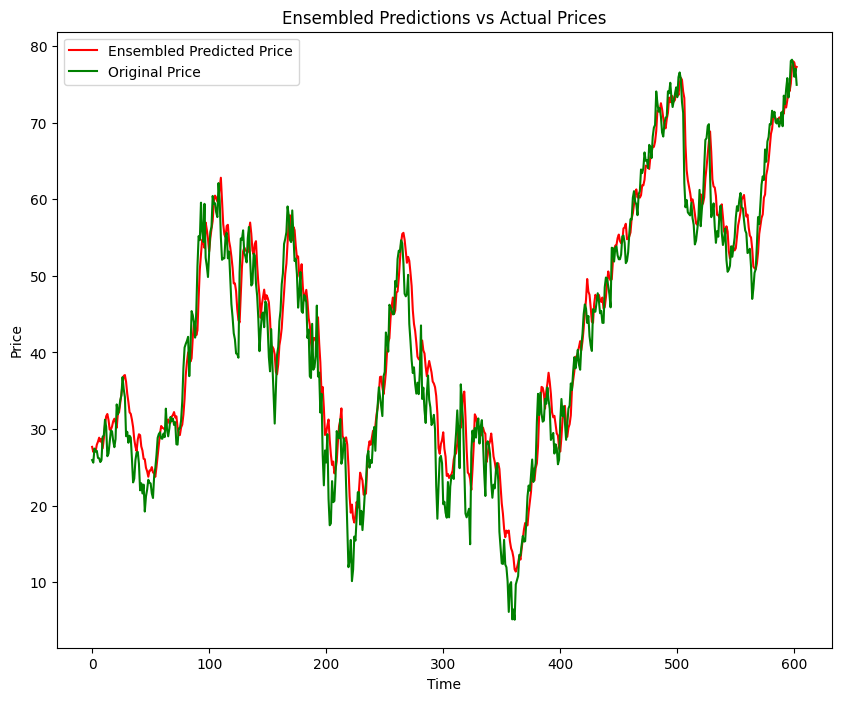

In [ ]:
# Plotting ensemble results
plt.figure(figsize=(10,8))
plt.plot(ensemble_predictions, 'r', label='Ensembled Predicted Price')
plt.plot(ytest, 'g', label='Original Price')  # Assuming 'y' contains actual values
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Ensembled Predictions vs Actual Prices')
plt.legend()
plt.show()



Mean Squared Error: 15.643586497305064
Mean Absolute Error: 3.0551637783173735
Mean Absolute Percentage Error: 10.66%


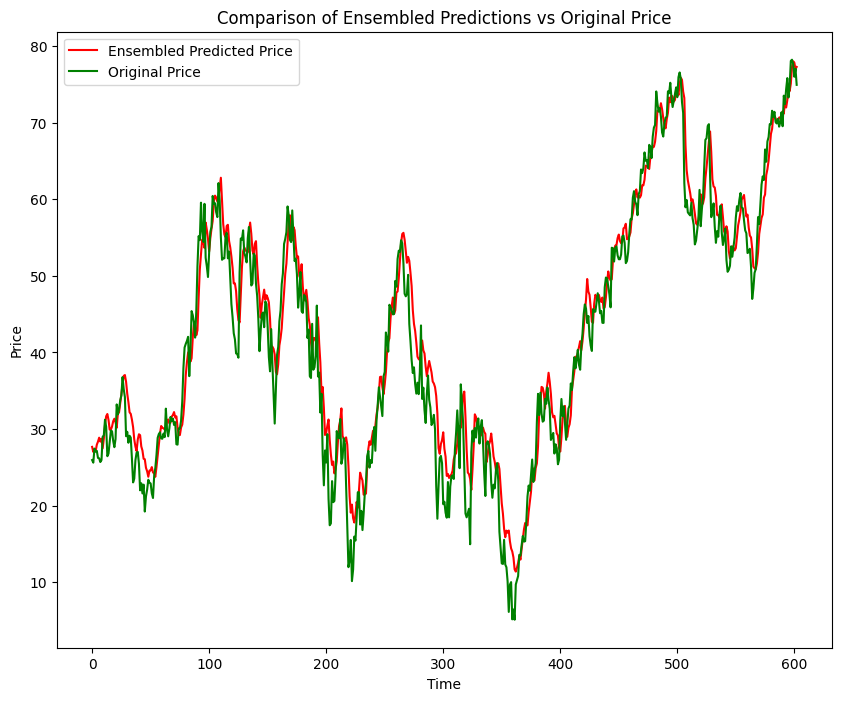

In [ ]:

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Assuming y_test contains the actual stock prices and has been scaled back to the original scale
# Assuming ensemble_predictions also scaled back to the original scale

# Calculate MSE, MAE, and MAPE
mse = mean_squared_error(ytest, ensemble_predictions)
mae = mean_absolute_error(ytest, ensemble_predictions)
mape = mean_absolute_percentage_error(ytest, ensemble_predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape*100:.2f}%")

# Plotting the results
plt.figure(figsize=(10,8))
plt.plot(ensemble_predictions, 'r', label='Ensembled Predicted Price')
plt.plot(ytest, 'g', label='Original Price')  # Assuming 'y_test' contains actual values
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Comparison of Ensembled Predictions vs Original Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_test contains the actual stock prices and has been scaled back to the original scale
# Assuming ensemble_predictions also scaled back to the original scale

# Calculate MSE
mse = mean_squared_error(ytest, ensemble_predictions)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 3.9551974030767494


In [ ]:
ytt = np.array(ytest)
print(ytt)
y_predict



[25.95999908 25.62000275 27.45999908 27.04999542 27.15999603 26.23999786
 26.18999481 25.70000458 25.95999908 28.98999786 29.20000458 31.21999359
 30.29000092 26.45999908 26.79999542 28.29000092 29.81000519 29.71999359
 28.45999908 27.63999176 28.70000458 33.21999359 31.93000031 32.60999298
 33.74999237 34.40000153 36.79000092 35.20999908 34.1700058  29.06999969
 29.65000153 28.21999359 29.12999725 28.88999176 26.15999603 23.04000092
 23.52999115 25.95000458 26.93000031 27.01999664 25.46999359 22.01000214
 22.93000031 21.59999847 22.74999237 19.23999786 21.20999908 22.09999847
 23.38999176 22.99999237 22.90999603 21.60999298 21.01000214 23.85999298
 24.93999481 26.65000153 28.85999298 29.35999298 29.5799942  28.79000092
 28.73999786 29.4200058  28.95000458 32.6700058  29.90000153 29.06000519
 30.12000275 31.59000397 31.06000519 31.37999725 30.54000092 30.90999603
 28.01999664 27.96999359 30.09000397 30.09999847 31.09999847 33.59000397
 37.96999359 40.65000153 41.12000275 41.51000214 42

array([[29.13289387],
       [28.12401791],
       [28.86836688],
       [27.50313818],
       [28.51395339],
       [29.04498159],
       [30.49493864],
       [30.01214717],
       [31.29239812],
       [29.00038563],
       [30.16436731],
       [32.23885651],
       [32.73618543],
       [32.72084851],
       [33.16983348],
       [32.39612292],
       [32.4810121 ],
       [32.03497098],
       [32.26862367],
       [32.96512516],
       [32.83901741],
       [31.62910421],
       [32.97896568],
       [31.76533713],
       [33.29758447],
       [35.0795836 ],
       [37.07300154],
       [37.65377219],
       [37.63653563],
       [36.83004881],
       [37.12279294],
       [36.97555846],
       [35.52889023],
       [35.05083503],
       [33.15763386],
       [32.19287371],
       [31.43215526],
       [31.16402246],
       [29.57152991],
       [31.18499769],
       [31.37035071],
       [31.36088984],
       [30.60652525],
       [31.1047935 ],
       [30.13729694],
       [30

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


NameError: name 'y_pred' is not defined